# Read in PSSM files and Generate Heat Map of Results

In [23]:
# Read in all files present in pssms folder

import pandas as pd
import glob
import os

path = "pssms/"
all_files = glob.glob(os.path.join(path, "*.csv"))

# Generate master concatenated dataframe 
concatenated_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
print(concatenated_df)

split_seeds = concatenated_df["split_seed"].tolist()


      A   U   C   G  split_seed  pop_seed  position
0    -4  16   3 -14          80         5         1
1   -16  12  12  -8          80         5         2
2     9  -7   1  -3          80         5         3
3     0  -4   9  -5          80         5         4
4    -4  -5  12  -2          80         5         5
..   ..  ..  ..  ..         ...       ...       ...
445  14  -7   5 -12          20         5        41
446  -4   0   0   5          20         5        42
447 -13   9   8  -3          20         5        43
448   4  -4  -1   0          20         5        44
449   2 -10  -2  10          20         5        45

[450 rows x 7 columns]
5


## Group by position and Find Standard Deviation at each position of each PSSM

In [2]:
# group data by position on chromosome
grouped = concatenated_df.groupby(by="position")

# Find the standard deviation of each base by position
grouped_stddev = grouped[['A', 'U', 'C', 'G']].apply(lambda x: x.std())

print(grouped_stddev)

                 A         U         C         G
position                                        
1         1.766981  3.502380  2.118700  2.458545
2         1.567021  1.712698  2.710064  2.013841
3         3.198958  2.263233  2.674987  2.309401
4         1.159502  1.888562  2.043961  2.503331
5         3.478505  3.503966  2.311805  2.685351
6         2.836273  3.414023  2.496664  2.270585
7         2.412928  2.529822  3.267687  2.097618
8         2.043961  2.378141  1.751190  2.201010
9         2.584140  2.131770  2.118700  1.702939
10        1.766981  2.078995  1.337494  1.563472
11        2.820559  2.529822  2.458545  2.347576
12        3.335000  2.469818  2.118700  2.756810
13        3.529243  3.614784  2.043961  3.011091
14        2.024846  3.865805  1.873796  2.907844
15        1.852926  5.130519  3.231787  1.813529
16        2.406011  2.211083  1.873796  1.776388
17        1.852926  1.955050  2.131770  2.503331
18        2.406011  2.330951  3.093003  2.233582
19        3.128720  

## Generate Heat Map of Results

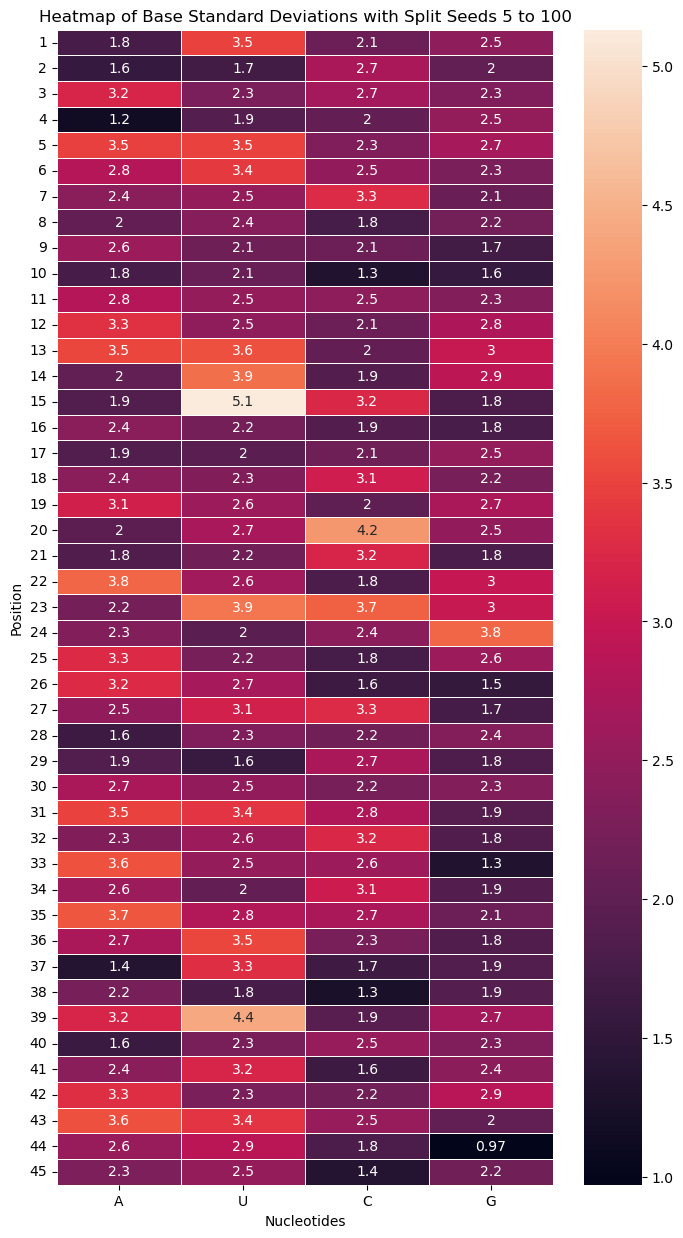

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 15))
sns.heatmap(grouped_stddev, annot=True, linewidths=0.5)

# Customize the plot
plt.title(f"Heatmap of Base Standard Deviations")
plt.xlabel("Nucleotides")
plt.ylabel("Position")
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show the plot
plt.show()